I'm not sure how to comment on this when the starter code kinda already states what the code is going to do anyways

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#using OS path to create proper directory
city_data_to_load = os.path.join("..","Resources", "city_data.csv")
ride_data_to_load = os.path.join("..","Resources", "ride_data.csv")
#saving time for later 
#(I accidentally had Analysis in the wrong folder so it took me hours to debug the saving... just to realize I misplaced the folder)
file_to_save = os.path.join("..","Resources", "Analysis", "Pyber_fare_summary.png")
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [4]:
#counting the number of cities.
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
#checking for nulls in the city data
city_df.isnull().sum()
#yay no nulls

city            0
driver_count    0
type            0
dtype: int64

In [6]:
#checking the data types of the city data
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
#making sure there are no odd types
citytypes = city_df["type"].unique()
citytypes

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
#getting the number of cities in each type
for type in citytypes:
    sum_of_type = sum(city_df["type"]==type)
    print(f" number of {type} types: {sum_of_type}")

 number of Urban types: 66
 number of Suburban types: 36
 number of Rural types: 18


In [9]:
#counting the length of ride
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
#checking for nulls in ride
ride_df.isnull().sum()
#I am once again happy there are no nulls

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
#looking at the data types for ride
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
#merging the 2 frames
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
pyber_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [13]:
#  1. Get the total rides for each city type
total_rides = pyber_df.groupby(["type"]).count()["ride_id"]
#I could use print, but the number of types is less than five so head does the same thing with less letters. 
#Except for typing out this explination as to why I'm using head instead of print
total_rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [14]:
# 2. Get the total drivers for each city type
total_drivers = pyber_df.groupby(["type"]).sum()["driver_count"]
total_drivers.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [15]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_df.groupby(["type"]).sum()["fare"]
total_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [16]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_rider = total_fares/total_rides
average_fare_per_rider.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [17]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares/total_drivers
average_fare_per_driver.head()

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [18]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides" : total_rides,
    "Total Drivers" : total_drivers,
    "Total Fares" : total_fares,
    "Average Fare per Ride" : average_fare_per_rider,
    "Average Fare per Driver" : average_fare_per_driver})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [19]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [20]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


## Deliverable 2:  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [21]:
# 1. Read the merged DataFrame
pyber_df.head(10)
pyber_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [22]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_df = pyber_df.groupby(["type","date"]).sum()["fare"]
type_date_df.head(10)

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
       2019-01-08 06:19:45    19.39
       2019-01-09 15:30:35    31.84
       2019-01-11 04:39:27    16.42
       2019-01-14 07:09:17    18.05
       2019-01-14 15:58:48    54.10
Name: fare, dtype: float64

In [23]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
type_date_df = type_date_df.reset_index()
type_date_df.head(10)
#type_date_df.dtypes

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
5,Rural,2019-01-08 06:19:45,19.39
6,Rural,2019-01-09 15:30:35,31.84
7,Rural,2019-01-11 04:39:27,16.42
8,Rural,2019-01-14 07:09:17,18.05
9,Rural,2019-01-14 15:58:48,54.10


In [24]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_df = pd.pivot(type_date_df, index = "date",columns = "type", values = "fare")
pivot_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [25]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
april_df = pivot_df.loc['2019-01-01 00:00:00' : '2019-04-29 00:00:00']
#april_df.head(10)
april_df.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-04-28 09:25:03,NaN,NaN,37.35
2019-04-28 10:54:14,NaN,NaN,10.07
2019-04-28 11:40:49,NaN,43.22,NaN
2019-04-28 11:49:26,NaN,39.19,NaN
2019-04-28 12:48:34,NaN,NaN,33.35
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN


In [26]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
april_df.index = pd.to_datetime(april_df.index)
april_df.head()
april_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [27]:
# 7. Check that the datatype for the index is datetime using df.info()
april_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [28]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week
weekly_fares_til_april_df = april_df.resample("W").sum()
weekly_fares_til_april_df.info()
weekly_fares_til_april_df.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [29]:
#setting up x,axis ticks for the graph
x = weekly_fares_til_april_df.index
ticks = [x[0],x[4],x[8],x[12],x[16]]

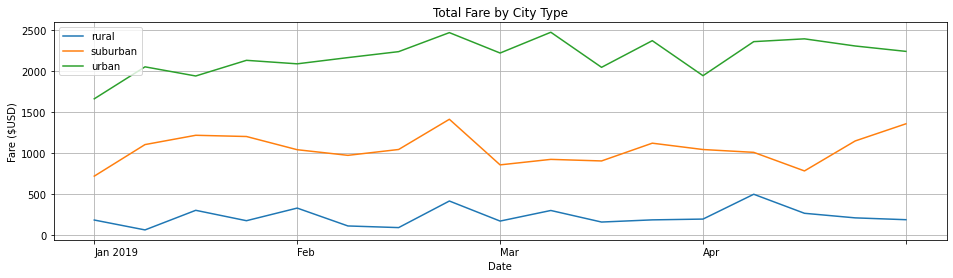

In [30]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot()
#stacking plots on top of eachother
ax.plot(weekly_fares_til_april_df.index,weekly_fares_til_april_df.values[:,0],label='rural')
ax.plot(weekly_fares_til_april_df.index,weekly_fares_til_april_df.values[:,1],label='suburban')
ax.plot(weekly_fares_til_april_df.index,weekly_fares_til_april_df.values[:,2],label='urban')
ax.set_title("Total Fare by City Type")
ax.set_xlabel('Date')
ax.set_ylabel('Fare ($USD)')
plt.grid(True)
ax.legend()
ax.xaxis_date()
ax.set_xticks(ticks)
ax.set_xticklabels(['Jan 2019','Feb','Mar','Apr',''],horizontalalignment='left')
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig(file_to_save)
plt.show()
#This was the closest I could get to the file provided.